<a href="https://colab.research.google.com/github/Riyaz329-dev/Digital-twin/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PHASE 1. Mount Drive & copy input files (Colab)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
KAGGLE_PATH = "/content/drive/MyDrive/Project/Dataset.csv"
COLLECTED_PATH = "/content/drive/MyDrive/Project/Collected_dataset.csv"


In [ ]:
import shutil, os

shutil.copy(KAGGLE_PATH, "Dataset.csv")
shutil.copy(COLLECTED_PATH, "Collected_dataset.csv")

print(" Files copied into Colab runtime.")
print("Exists Dataset.csv?", os.path.exists("Dataset.csv"))
print("Exists Collected_dataset.csv?", os.path.exists("Collected_dataset.csv"))


 Files copied into Colab runtime.
Exists Dataset.csv? True
Exists Collected_dataset.csv? True


#  Phase 2: Data Ingestion & Basic Audit


In [ ]:
# importing datasets
import pandas as pd

kaggle_df = pd.read_csv("Dataset.csv")

collected_df = pd.read_csv("Collected_dataset.csv")



In [ ]:
print("Kaggle shape:", kaggle_df.shape)
print("Kaggle columns:", list(kaggle_df.columns))

print("\nCollected shape:", collected_df.shape)
print("Collected columns:", list(collected_df.columns))


Kaggle shape: (100000, 9)
Kaggle columns: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

Collected shape: (300, 12)
Collected columns: ['patient_id', 'Date', 'Time', 'gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


In [ ]:
print("\n--- Kaggle Dataset Info ---")
print(kaggle_df.info())
print("\n--- Collected Dataset Info ---")
print(collected_df.info())


--- Kaggle Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

--- Collected Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----

In [ ]:
 # Quick stats (numerical summary)
print("\n--- Kaggle Describe ---")
print(kaggle_df.describe().T)

print("\n--- Collected Describe ---")
print(collected_df.describe().T)


--- Kaggle Describe ---
                        count        mean        std    min     25%     50%  \
age                  100000.0   41.886436  22.516261   0.08   24.00   43.00   
hypertension         100000.0    0.074890   0.263215   0.00    0.00    0.00   
heart_disease        100000.0    0.039440   0.194640   0.00    0.00    0.00   
bmi                  100000.0   27.320931   6.636665  10.01   23.63   27.32   
HbA1c_level          100000.0    5.527600   1.070764   3.50    4.80    5.80   
blood_glucose_level  100000.0  138.062000  40.708760  80.00  100.00  140.00   
diabetes             100000.0    0.085050   0.278957   0.00    0.00    0.00   

                        75%     max  
age                   60.00   80.00  
hypertension           0.00    1.00  
heart_disease          0.00    1.00  
bmi                   29.58   95.69  
HbA1c_level            6.20    9.00  
blood_glucose_level  159.00  300.00  
diabetes               0.00    1.00  

--- Collected Describe ---
          

In [ ]:
# Checking missing values
print("\n--- Missing Values (Kaggle) ---")
print(kaggle_df.isnull().sum())

print("\n--- Missing Values (Collected) ---")
print(collected_df.isnull().sum())


--- Missing Values (Kaggle) ---
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

--- Missing Values (Collected) ---
patient_id             0
Date                   0
Time                   0
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
# Peek categorical unique values
print("\n--- Kaggle Smoking History ---")
print(kaggle_df['smoking_history'].value_counts())

print("\n--- Collected Smoking History ---")
print(collected_df['smoking_history'].value_counts())


--- Kaggle Smoking History ---
smoking_history
No Info        35814
never          35097
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

--- Collected Smoking History ---
smoking_history
never      180
past        60
current     30
ever        30
Name: count, dtype: int64


## PHASE 3. Harmonize categories & timestamps

In [ ]:
# for kaggle dataset
kaggle_df['smoking_history'] = kaggle_df['smoking_history'].replace({
    'former': 'past',
    'not current': 'past',
    'No Info': 'unknown'

})


In [ ]:
# Combine Date + Time into a single datetime column
collected_df['timestamp'] = pd.to_datetime(
    collected_df['Date'] + ' ' + collected_df['Time'],
    errors='coerce'
)
# Drop old Date/Time columns (if not needed anymore)
collected_df.drop(['Date', 'Time'], axis=1, inplace=True)
collected_df.to_csv("Collected_dataset.csv", index=False)

In [ ]:
# Convert categorical columns
collected_df['gender'] = collected_df['gender'].astype('category')
kaggle_df['gender'] = kaggle_df['gender'].astype('category')

# Ensure numeric columns are correct dtype
num_cols = ['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level','diabetes']
collected_df[num_cols] = collected_df[num_cols].apply(pd.to_numeric, errors='coerce')
kaggle_df[num_cols] = kaggle_df[num_cols].apply(pd.to_numeric, errors='coerce')


In [ ]:
kaggle_df.drop_duplicates(inplace=True)
collected_df.drop_duplicates(inplace=True)



## PHASE 4. One-hot encode & align (save cleaned files)

In [ ]:

# ---- One-Hot Encoding for Kaggle Dataset ----

# Check categorical columns first
print("Unique genders:", kaggle_df['gender'].unique())
print("Unique smoking_history:", kaggle_df['smoking_history'].unique())

# One-hot encode (drop_first=True avoids dummy trap)
kaggle_encoded = pd.get_dummies(
    kaggle_df,
    columns=['gender', 'smoking_history'],
    drop_first=True
)

print("Original shape:", kaggle_df.shape)
print("Encoded shape:", kaggle_encoded.shape)
print("Encoded columns:", kaggle_encoded.columns.tolist()[:15], "...")

kaggle_encoded.to_csv("Kaggle_cleaned.csv", index=False)


Unique genders: ['Female', 'Male', 'Other']
Categories (3, object): ['Female', 'Male', 'Other']
Unique smoking_history: ['never' 'unknown' 'current' 'past' 'ever']
Original shape: (96049, 9)
Encoded shape: (96049, 13)
Encoded columns: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'gender_Male', 'gender_Other', 'smoking_history_ever', 'smoking_history_never', 'smoking_history_past', 'smoking_history_unknown'] ...


In [ ]:
# ---- One-Hot Encoding for Collected Dataset (aligned with Kaggle) ----
import pandas as pd

# Load datasets
collected_df = pd.read_csv("Collected_dataset.csv")
collected_df["timestamp"] = pd.to_datetime(collected_df["timestamp"], errors="coerce")

# One-hot encode collected (like Kaggle)
collected_oh = pd.get_dummies(
    collected_df,
    columns=["gender","smoking_history"],
    drop_first=True
)

# Ensure collected has all Kaggle columns (fill missing with 0)
for col in kaggle_encoded.columns:
    if col not in collected_oh.columns:
        collected_oh[col] = 0

# Align order with Kaggle’s encoded columns
collected_oh = collected_oh[kaggle_encoded.columns]

# Final dataset = patient_id + timestamp + aligned features
collected_encoded = pd.concat(
    [collected_df[["patient_id","timestamp"]], collected_oh],
    axis=1
)

print("Collected_encoded shape:", collected_encoded.shape)
print("Collected columns:", list(collected_encoded.columns))

# Save for reuse
collected_encoded.to_csv("Collected_cleaned.csv", index=False)


Collected_encoded shape: (300, 15)
Collected columns: ['patient_id', 'timestamp', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'gender_Male', 'gender_Other', 'smoking_history_ever', 'smoking_history_never', 'smoking_history_past', 'smoking_history_unknown']


In [ ]:
print("Kaggle shape:", kaggle_encoded.shape)
print("Kaggle columns:", list(kaggle_encoded.columns))

Kaggle shape: (96049, 13)
Kaggle columns: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'gender_Male', 'gender_Other', 'smoking_history_ever', 'smoking_history_never', 'smoking_history_past', 'smoking_history_unknown']


In [ ]:
df = kaggle_encoded.copy()

print("Kaggle shape:", df.shape)
print("Kaggle columns:", list(df.columns))

Kaggle shape: (96049, 13)
Kaggle columns: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'gender_Male', 'gender_Other', 'smoking_history_ever', 'smoking_history_never', 'smoking_history_past', 'smoking_history_unknown']


## PHASE 5. Model training (XGBoost / Neural Net / Gradient Boosting)

In [ ]:
from sklearn.model_selection import train_test_split

# Select features and target
features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_Male', 'gender_Other', 'smoking_history_ever', 'smoking_history_never', 'smoking_history_past', 'smoking_history_unknown']
X = df[features]
y = df['diabetes']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import numpy as np

# Train
xgb_clf = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    eval_metric="logloss",
    random_state=42,
)
xgb_clf.fit(X_train, y_train)

# Predict
y_pred = xgb_clf.predict(X_test)
y_proba = xgb_clf.predict_proba(X_test)[:, 1]

# Metrics
print(" XGBoost Classifier")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))


 XGBoost Classifier
Accuracy : 0.9715252472670484
Precision: 0.9671592775041051
Recall   : 0.6991097922848665
F1-score : 0.8115742335514985
ROC-AUC  : 0.9792512095903689

Confusion Matrix:
 [[17485    40]
 [  507  1178]]

Classification Report:
               precision    recall  f1-score   support

           0      0.972     0.998     0.985     17525
           1      0.967     0.699     0.812      1685

    accuracy                          0.972     19210
   macro avg      0.969     0.848     0.898     19210
weighted avg      0.971     0.972     0.969     19210



In [ ]:

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks


# Compute class weights to handle imbalance (so recall improves)
classes = np.unique(y_train)
cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight = {int(c): w for c, w in zip(classes, cw)}

# Build the model
nn_clf = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(1, activation="sigmoid")   # binary classification
])

nn_clf.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=[keras.metrics.AUC(name="auc"), "accuracy"]
)

es = callbacks.EarlyStopping(monitor="val_auc", mode="max", patience=5, restore_best_weights=True)

history = nn_clf.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weight,
    callbacks=[es],
    verbose=1
)

# Predictions
y_proba = nn_clf.predict(X_test).ravel()
y_pred  = (y_proba >= 0.5).astype(int)

# Metrics
print("Neural Network Classifier")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))




Epoch 1/30
961/961 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5011 - auc: 0.6060 - loss: 2.0199 - val_accuracy: 0.5689 - val_auc: 0.8345 - val_loss: 0.6846
Epoch 2/30
961/961 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5694 - auc: 0.7697 - loss: 0.5940 - val_accuracy: 0.5937 - val_auc: 0.8389 - val_loss: 0.5792
Epoch 3/30
961/961 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6207 - auc: 0.7982 - loss: 0.5442 - val_accuracy: 0.6180 - val_auc: 0.8441 - val_loss: 0.5773
Epoch 4/30
961/961 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6615 - auc: 0.8227 - loss: 0.5136 - val_accuracy: 0.7786 - val_auc: 0.8637 - val_loss: 0.4410
Epoch 5/30
961/961 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7220 - auc: 0.8518 - loss: 0.4729 - val_accuracy: 0.8267 - val_auc: 0.9081 - val_loss: 0.3815
Epoch 6/30
961/961 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7650 - auc: 0.8850 - loss: 0.4293 - val_accuracy: 0.8394 - val_auc: 0.9170 - val_loss: 0.3530
Epoch 7/30
961/961 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# -------------------------------
# Gradient Boosting Classifier (diabetes prediction)
# -------------------------------
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import numpy as np, joblib
gbr_clf = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,       # stochastic boosting helps generalization
    random_state=42
)

# Train
gbr_clf.fit(X_train, y_train)

# Predict
y_pred = gbr_clf.predict(X_test)
y_proba = gbr_clf.predict_proba(X_test)[:, 1]


# Evaluate
print("Gradient Boosting Classifier")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))



Gradient Boosting Classifier
Accuracy : 0.9720458094742321
Precision: 0.9807370184254607
Recall   : 0.6949554896142434
F1-score : 0.8134769017019798
ROC-AUC  : 0.980100339912884

Confusion Matrix:
 [[17502    23]
 [  514  1171]]

Classification Report:
               precision    recall  f1-score   support

           0      0.971     0.999     0.985     17525
           1      0.981     0.695     0.813      1685

    accuracy                          0.972     19210
   macro avg      0.976     0.847     0.899     19210
weighted avg      0.972     0.972     0.970     19210



## PHASE 6. Choose deployed model, pick threshold, and save artifacts

In [ ]:
# --- Pick Gradient as the deployed model and choose a decision threshold ---
import numpy as np, joblib
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

best_model   = gbr_clf                    # <— your trained Gradient Boosting model
feature_cols = list(X_train.columns)      # exact feature columns used in training

# Get predicted probabilities on the TEST set
y_proba_test = best_model.predict_proba(X_test)[:, 1]

# Pick a threshold. Here: best F1 on the test set (simple + fair).
prec, rec, thr = precision_recall_curve(y_test, y_proba_test)
f1 = 2*prec*rec/(prec+rec+1e-9)
best_idx = int(np.nanargmax(f1))
decision_threshold = float(thr[best_idx])

# Print metrics at that threshold (for your report)
y_pred_best = (y_proba_test >= decision_threshold).astype(int)
print("Chosen threshold:", round(decision_threshold, 3))
print("Acc:", round(accuracy_score(y_test, y_pred_best),3),
      "Prec:", round(precision_score(y_test, y_pred_best),3),
      "Rec:",  round(recall_score(y_test, y_pred_best),3),
      "F1:",   round(f1[best_idx],3),
      "AUC:",  round(roc_auc_score(y_test, y_proba_test),3))

# Save artifacts (so you can reload even after a Colab restart)
joblib.dump(best_model, "best_model.pkl")
joblib.dump(feature_cols, "feature_cols.pkl")
joblib.dump(decision_threshold, "decision_threshold.pkl")
print("Saved: best_model.pkl, feature_cols.pkl, decision_threshold.pkl")


Chosen threshold: 0.432
Acc: 0.972 Prec: 0.963 Rec: 0.711 F1: 0.818 AUC: 0.98
Saved: best_model.pkl, feature_cols.pkl, decision_threshold.pkl


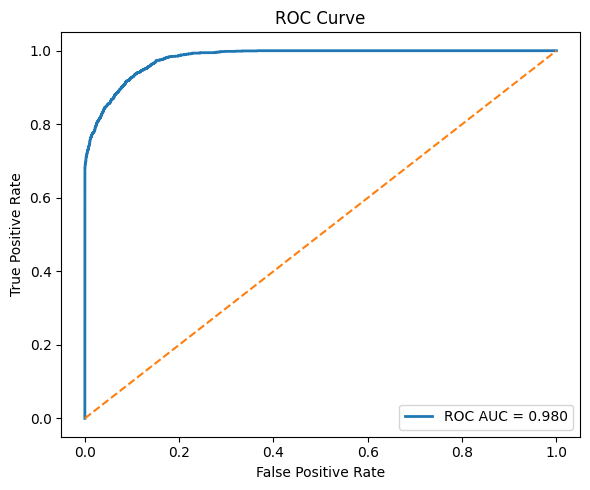

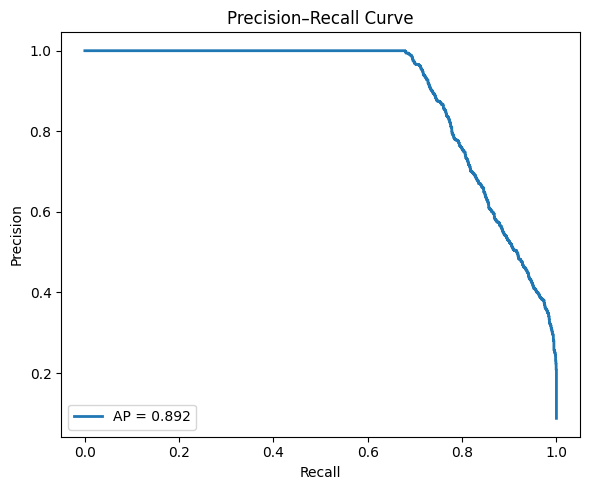

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

fpr, tpr, _ = roc_curve(y_test, y_proba_test)
roc_auc = auc(fpr, tpr)

prec, rec, _ = precision_recall_curve(y_test, y_proba_test)
ap = average_precision_score(y_test, y_proba_test)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, lw=2, label=f"ROC AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout(); plt.savefig("viz_roc_curve.png", dpi=200)
plt.show()

plt.figure(figsize=(6,5))
plt.plot(rec, prec, lw=2, label=f"AP = {ap:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend(loc="lower left")
plt.tight_layout(); plt.savefig("viz_pr_curve.png", dpi=200)
plt.show()


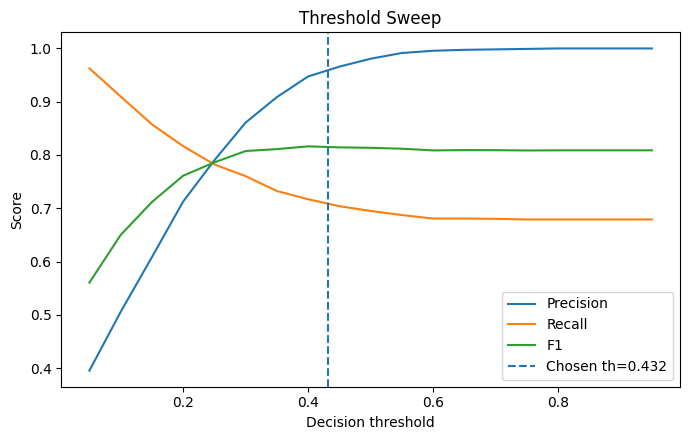

In [ ]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.metrics import f1_score

ths = np.linspace(0.05, 0.95, 19)
precisions, recalls, f1s = [], [], []

for th in ths:
    yp = (y_proba_test >= th).astype(int)
    # Safe guards for zero-division in edge thresholds:
    tp = ((yp==1)&(y_test==1)).sum()
    fp = ((yp==1)&(y_test==0)).sum()
    fn = ((yp==0)&(y_test==1)).sum()
    precision = tp/(tp+fp) if (tp+fp)>0 else 0
    recall    = tp/(tp+fn) if (tp+fn)>0 else 0
    precisions.append(precision); recalls.append(recall)
    f1s.append(f1_score(y_test, yp) if (tp+fp)>0 and (tp+fn)>0 else 0)

plt.figure(figsize=(7,4.5))
plt.plot(ths, precisions, label="Precision")
plt.plot(ths, recalls, label="Recall")
plt.plot(ths, f1s, label="F1")
plt.axvline(decision_threshold, linestyle="--", label=f"Chosen th={decision_threshold:.3f}")
plt.xlabel("Decision threshold"); plt.ylabel("Score")
plt.title("Threshold Sweep")
plt.legend(); plt.tight_layout()
plt.savefig("viz_threshold_sweep.png", dpi=200)
plt.show()


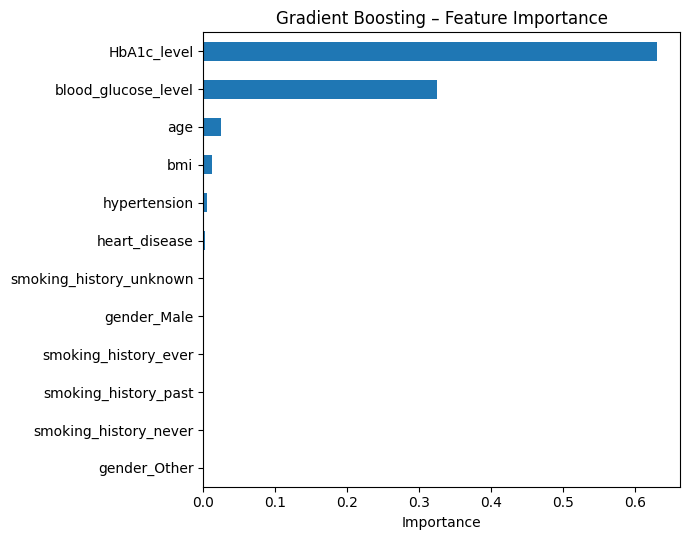

In [ ]:
import pandas as pd, matplotlib.pyplot as plt
imp = pd.Series(best_model.feature_importances_, index=X_test.columns).sort_values(ascending=True)

plt.figure(figsize=(7,5.5))
imp.tail(12).plot(kind="barh")
plt.title("Gradient Boosting – Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.savefig("viz_feature_importance.png", dpi=200)
plt.show()


## PHASE 7. Live simulation (replay) + advice + logging

<Figure size 550x500 with 0 Axes>

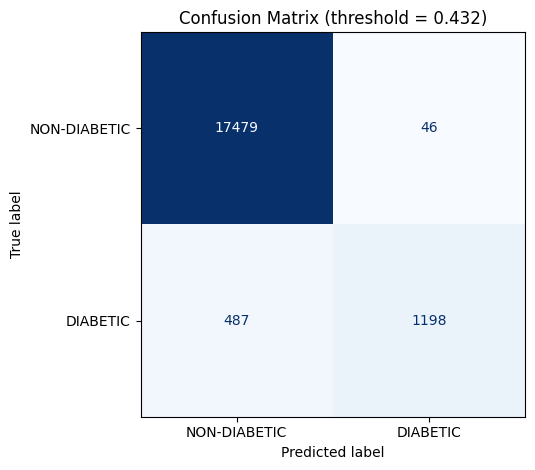

              precision    recall  f1-score   support

           0      0.973     0.997     0.985     17525
           1      0.963     0.711     0.818      1685

    accuracy                          0.972     19210
   macro avg      0.968     0.854     0.902     19210
weighted avg      0.972     0.972     0.970     19210



In [ ]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# If needed, rebuild preds from probas + your saved threshold:
y_pred_thr = (y_proba_test >= decision_threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_thr)
disp = ConfusionMatrixDisplay(cm, display_labels=["NON-DIABETIC","DIABETIC"])

plt.figure(figsize=(5.5,5))
disp.plot(cmap="Blues", values_format='d', colorbar=False)
plt.title(f"Confusion Matrix (threshold = {decision_threshold:.3f})")
plt.tight_layout()
plt.savefig("viz_confusion_matrix.png", dpi=200)
plt.show()

print(classification_report(y_test, y_pred_thr, digits=3))


In [ ]:
import pandas as pd, time, joblib
from datetime import datetime

# assumes you already loaded:
model = joblib.load("best_model.pkl")
feature_cols = joblib.load("feature_cols.pkl")
threshold = joblib.load("decision_threshold.pkl")
df_live = pd.read_csv("Collected_cleaned.csv")

# 1) Prepare & sort
df_live['timestamp'] = pd.to_datetime(df_live['timestamp'])
df_live = df_live.sort_values('timestamp').reset_index(drop=True)

# 2) Create a shifted-to-today timeline (OPTIONAL)
start_date_hist = df_live['timestamp'].dt.normalize().min()
today_norm = pd.Timestamp.now().normalize()
delta_to_today = today_norm - start_date_hist
df_live['shifted_timestamp'] = df_live['timestamp'] + delta_to_today

# 3) Choose what to SHOW when printing
PRINT_MODE = "shifted"   # "historical", "now", or "shifted"

# 4) Capture outputs for later visualization
records = []

# 5) Stream
for _, row in df_live.iterrows():
    patient_id = row['patient_id']
    glucose    = row['blood_glucose_level']
    hba1c      = row['HbA1c_level']

    # arrival time (real wall-clock)
    arrival_ts = pd.Timestamp.now()

    # pick which time to show
    if PRINT_MODE == "historical":
        shown_ts = row['timestamp']
    elif PRINT_MODE == "now":
        shown_ts = arrival_ts
    else:  # "shifted"
        shown_ts = row['shifted_timestamp']

    # --- MODEL PREDICTION ---
    x_live = pd.DataFrame([row[feature_cols].values], columns=feature_cols)
    proba = model.predict_proba(x_live)[0][1]
    pred  = int(proba >= threshold)
    status = "🟢 NORMAL" if pred == 0 else "🔴 DIABETIC"

    # --- ADVICE / RECOMMENDATION SECTION ---
    if glucose < 140 and hba1c < 6:
        advice = "✅ Glucose level normal. Maintain healthy diet and regular exercise."
    elif 140 <= glucose < 180 or (6 <= hba1c < 7):
        advice = "⚠️ Slightly elevated glucose detected. Recheck after a few hours and limit sugar intake."
    elif glucose >= 180 or hba1c >= 7:
        advice = "🚨 High glucose detected! Please monitor diet closely and consult your physician."
    else:
        advice = "ℹ️ Unable to determine — please verify readings."

    # --- PRINT LIVE OUTPUT WITH ADVICE ---
    print(f"{shown_ts:%Y-%m-%d %H:%M:%S} | Patient: {patient_id} | "
          f"Glucose: {glucose:.1f} | HbA1c: {hba1c:.2f} | {status} (Prob={proba:.3f})")
    print(f"  → Suggestion: {advice}\n")

    # --- SAVE TO RECORDS FOR VISUALIZATION ---
    records.append({
        "patient_id": patient_id,
        "historical_ts": row['timestamp'],
        "shifted_ts": row['shifted_timestamp'],
        "arrival_ts": arrival_ts,
        "shown_ts": shown_ts,
        "glucose": glucose,
        "hba1c": hba1c,
        "proba": proba,
        "pred": pred,
        "advice": advice
    })

    time.sleep(0.5)  # pacing

# --- SAVE RESULTS ---
pd.DataFrame(records).to_csv("live_predictions_log.csv", index=False)
print("\n✅ Live simulation completed successfully with patient advice.")
print("📁 Log saved: live_predictions_log.csv")


2025-10-10 01:00:00 | Patient: P1 | Glucose: 173.0 | HbA1c: 7.80 | 🔴 DIABETIC (Prob=0.995)
  → Suggestion: ⚠️ Slightly elevated glucose detected. Recheck after a few hours and limit sugar intake.

2025-10-10 01:00:00 | Patient: P5 | Glucose: 159.0 | HbA1c: 7.30 | 🔴 DIABETIC (Prob=0.995)
  → Suggestion: ⚠️ Slightly elevated glucose detected. Recheck after a few hours and limit sugar intake.

2025-10-10 01:00:00 | Patient: P9 | Glucose: 70.0 | HbA1c: 5.40 | 🟢 NORMAL (Prob=0.002)
  → Suggestion: ✅ Glucose level normal. Maintain healthy diet and regular exercise.

2025-10-10 01:00:00 | Patient: P8 | Glucose: 101.0 | HbA1c: 5.10 | 🟢 NORMAL (Prob=0.000)
  → Suggestion: ✅ Glucose level normal. Maintain healthy diet and regular exercise.

2025-10-10 01:00:00 | Patient: P6 | Glucose: 92.0 | HbA1c: 5.10 | 🟢 NORMAL (Prob=0.000)
  → Suggestion: ✅ Glucose level normal. Maintain healthy diet and regular exercise.

2025-10-10 01:00:00 | Patient: P10 | Glucose: 80.0 | HbA1c: 5.50 | 🟢 NORMAL (Prob=0.00

In [ ]:
import pandas as pd

log = pd.read_csv("live_predictions_log.csv", parse_dates=["shown_ts","historical_ts","shifted_ts","arrival_ts"])
log["status"] = log["pred"].map({0:"NORMAL", 1:"DIABETIC"})
log.head()


## PHASE 8. Visualizations (trends & evaluation plots)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

xcol = "shown_ts"

for pid, g in log.sort_values(xcol).groupby("patient_id"):
    plt.figure(figsize=(11,5))

    # plot line + color-coded dots
    plt.plot(g[xcol], g["glucose"], linestyle='-', color='gray', alpha=0.6)
    colors = g["pred"].map({0:"green",1:"red"})
    plt.scatter(g[xcol], g["glucose"], c=colors, s=60, edgecolors='black')

    # reference line for diabetic threshold
    plt.axhline(180, color='orange', linestyle='--', label="Diabetic threshold (180 mg/dL)")

    # format x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
    plt.xticks(rotation=45)

    # ---- ADD TIME LABELS ABOVE EACH DOT ----
    for i, row in g.iterrows():
        time_label = row['shown_ts'].strftime('%H:%M')   # extract only time like 07:30
        plt.text(row[xcol], row['glucose'] + 3, time_label,
                 ha='center', va='bottom', fontsize=8, color='blue', rotation=45)

    plt.title(f"Patient {pid} — Glucose trend with time labels (green=NORMAL, red=DIABETIC)")
    plt.xlabel("Date")
    plt.ylabel("Blood Glucose (mg/dL)")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Random generator for small noise in forecasts
rng = np.random.default_rng(42)

# --- Hold-Last ---
def forecast_hold_last(history, horizon):
    """Repeats the last observed value for all future points."""
    last = history[-1]
    return np.clip(last + rng.normal(0, 0.5, size=horizon), 40, 400)

# --- EWMA ---
def ewma_level(history, alpha=0.4):
    ew = history[0]
    for x in history[1:]:
        ew = alpha*x + (1-alpha)*ew
    return ew

def forecast_ewma(history, horizon, alpha=0.4):
    """Recency-weighted smoothing forecast."""
    level = history[-1]
    ew = ewma_level(history, alpha)
    preds = []
    for _ in range(horizon):
        level = 0.6*level + 0.4*ew + rng.normal(0, 0.5)
        preds.append(max(level, 0))
    return np.array(preds)

# --- ARIMA ---
def forecast_arima(history, horizon):
    """Fits ARIMA(1,1,1) if possible; otherwise falls back to EWMA."""
    if len(history) < 8:
        return forecast_ewma(history, horizon)
    try:
        model = ARIMA(history, order=(1,1,1))
        res = model.fit(method_kwargs={"warn_convergence": False})
        return np.array(res.forecast(steps=horizon))
    except Exception:
        return forecast_ewma(history, horizon)



In [ ]:
# ---- Robust Forecast Demo (single patient, 5 steps) ----
import os, numpy as np, pandas as pd
from sklearn.metrics import mean_absolute_error

# 0) Load collected time-series (must have patient_id, timestamp, glucose column)
if os.path.exists("Collected_dataset.csv"):
    df_fore = pd.read_csv("Collected_dataset.csv")
elif os.path.exists("Collected_cleaned.csv"):
    df_fore = pd.read_csv("Collected_cleaned.csv")
else:
    raise FileNotFoundError("Missing Collected_dataset.csv (or Collected_cleaned.csv).")

# 1) Clean & detect columns
df_fore["patient_id"] = df_fore["patient_id"].astype(str)
df_fore["timestamp"]  = pd.to_datetime(df_fore["timestamp"], errors="coerce")

GLU_CANDIDATES = ["blood_glucose_level", "glucose", "Blood_Glucose_Level", "Blood Glucose Level"]
GLU_COL = next((c for c in GLU_CANDIDATES if c in df_fore.columns), None)
assert GLU_COL is not None, f"No glucose column found. Have: {df_fore.columns.tolist()}"

df_fore = (df_fore
           .dropna(subset=["patient_id", "timestamp", GLU_COL])
           .sort_values(["patient_id", "timestamp"])
           .reset_index(drop=True))

# 2) Forecast functions (uniform signature: (history, horizon))
rng = np.random.default_rng(42)

def forecast_hold_last(history, horizon):
    last = float(history[-1])
    # tiny noise so the line is visible; clamp to a reasonable range
    return np.clip(last + rng.normal(0, 0.5, size=horizon), 40, 400)

def ewma_level(history, alpha=0.4):
    ew = float(history[0])
    for x in history[1:]:
        ew = alpha*float(x) + (1-alpha)*ew
    return ew

def forecast_ewma(history, horizon, alpha=0.4):
    level = float(history[-1])
    base  = ewma_level(history, alpha)
    preds = []
    for _ in range(horizon):
        level = 0.6*level + 0.4*base + rng.normal(0, 0.5)
        preds.append(max(level, 0))
    return np.array(preds, dtype=float)

# ARIMA with safe fallback to EWMA
def forecast_arima(history, horizon):
    history = np.asarray(history, dtype=float)
    if len(history) < 8:
        return forecast_ewma(history, horizon, alpha=0.4)
    try:
        from statsmodels.tsa.arima.model import ARIMA
        model = ARIMA(history, order=(1,1,1))
        res = model.fit(method_kwargs={"warn_convergence": False})
        return np.array(res.forecast(steps=horizon), dtype=float)
    except Exception:
        return forecast_ewma(history, horizon, alpha=0.4)

# 3) Pick patient & split series
pid_test = sorted(df_fore["patient_id"].unique())[0]
series   = df_fore.loc[df_fore["patient_id"]==pid_test, GLU_COL].astype(float).values
print(f"Testing patient: {pid_test} | total readings: {len(series)}")
assert len(series) >= 10, "Too few points for a 5-step demo."

H = 5
train = series[:-H]
truth = series[-H:]

def rmse(a,b):
    a = np.asarray(a, float); b = np.asarray(b, float)
    return float(np.sqrt(np.mean((a-b)**2)))

# 4) Run methods (consistent positional calling)
methods = {
    "Hold-Last": forecast_hold_last,
    "EWMA":      lambda h, k: forecast_ewma(h, k, alpha=0.4),
    "ARIMA":     forecast_arima
}

for name, func in methods.items():
    pred = func(train, H)
    print(f"\n{name} forecast (last {H} actual vs predicted):")
    print("Actual :", np.round(truth, 1))
    print("Predict:", np.round(pred, 1))
    print("MAE:", mean_absolute_error(truth, pred), "| RMSE:", rmse(truth, pred))


In [ ]:
# ---- Quiet backtest over rolling windows (optional) ----
import warnings
from tqdm import tqdm

def safe_forecast(func, hist, H):
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            pred = np.asarray(func(hist, H), dtype=float)
    except Exception:
        return None
    if pred is None or len(pred)!=H or not np.all(np.isfinite(pred)):
        return None
    return pred

HORIZONS = [5, 10, 15]   # keep small for speed
records  = []

for pid in tqdm(sorted(df_fore["patient_id"].astype(str).unique()), desc="Patients"):
    s = df_fore.loc[df_fore["patient_id"]==pid, GLU_COL].astype(float).values
    n = len(s)
    if n < max(HORIZONS)+5:
        continue
    for H in HORIZONS:
        for t in range(5, n-H):
            hist, truth = s[:t], s[t:t+H]
            for name, func in methods.items():
                pred = safe_forecast(func, hist, H)
                if pred is None and name=="ARIMA":
                    pred = safe_forecast(lambda h,k: forecast_ewma(h,k,0.4), hist, H)
                if pred is None:
                    continue
                records.append({
                    "patient_id": pid, "t": t, "horizon": H, "method": name,
                    "mae": float(np.mean(np.abs(truth-pred))),
                    "rmse": rmse(truth, pred)
                })

bt = pd.DataFrame(records)
print("bt shape:", bt.shape)
display(bt.head())
display(bt.groupby(["method","horizon"])[["mae","rmse"]].mean().round(2))


Patients: 100%|██████████| 10/10 [00:21<00:00,  2.19s/it]

bt shape: (1350, 6)


,patient_id,t,horizon,method,mae,rmse
0,P1,5,5,Hold-Last,21.836967,26.466859
1,P1,5,5,EWMA,22.842554,28.061739
2,P1,5,5,ARIMA,22.850463,28.109839
3,P1,6,5,Hold-Last,49.138917,53.374418
4,P1,6,5,EWMA,39.254411,45.272137


mae   rmse
method    horizon              
ARIMA     5        14.91  17.30
          10       15.31  18.09
          15       15.60  18.43
EWMA      5        15.14  17.77
          10       15.15  18.01
          15       15.33  18.10
Hold-Last 5        18.47  21.42
          10       18.47  21.65
          15       18.33  21.49

In [ ]:
# --- PREP for backtest: define df_fore and GLU_COL ---

import os, pandas as pd, numpy as np

# 1) Load a per-patient time series table
if os.path.exists("Collected_dataset.csv"):
    df_fore = pd.read_csv("Collected_dataset.csv")
elif os.path.exists("Collected_cleaned.csv"):
    df_fore = pd.read_csv("Collected_cleaned.csv")
else:
    # fallback: if your working table is named df
    df_fore = df.copy()

# 2) Ensure timestamp exists
if "timestamp" not in df_fore.columns:
    if {"Date","Time"}.issubset(df_fore.columns):
        df_fore["timestamp"] = pd.to_datetime(df_fore["Date"]+" "+df_fore["Time"], errors="coerce")
    elif "historical_ts" in df_fore.columns:
        df_fore["timestamp"] = pd.to_datetime(df_fore["historical_ts"], errors="coerce")
    else:
        raise ValueError("No timestamp column found. Add/derive 'timestamp' first.")

# 3) Pick the glucose column automatically
GLU_CANDIDATES = ["blood_glucose_level","glucose","Blood_Glucose_Level","Blood Glucose Level"]
GLU_COL = next((c for c in GLU_CANDIDATES if c in df_fore.columns), None)
assert GLU_COL is not None, f"Glucose column not found. Available: {df_fore.columns.tolist()}"

# 4) Final cleanup + ordering
df_fore["patient_id"] = df_fore["patient_id"].astype(str)
df_fore["timestamp"]  = pd.to_datetime(df_fore["timestamp"], errors="coerce")
df_fore = df_fore.dropna(subset=["patient_id","timestamp", GLU_COL]) \
                 .sort_values(["patient_id","timestamp"]).reset_index(drop=True)

print("Using glucose column:", GLU_COL)
print(df_fore[["patient_id","timestamp",GLU_COL]].head())


In [ ]:
# Summary of mean ± std for each method and horizon
summary = bt.groupby(['method','horizon'])[['mae','rmse']].agg(['mean','std']).round(3)
summary


In [ ]:
# --- Quiet backtest with ARIMA fallback (run now) ---
import warnings, numpy as np, pandas as pd
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error

# If Phase 8 (forecast_* functions) hasn't been run yet, run it first.

def rmse(a, b):
    a = np.asarray(a, float); b = np.asarray(b, float)
    return float(np.sqrt(np.mean((a - b)**2)))

def safe_forecast(func, hist, H):
    """Run forecast, silence warnings, validate length/NaN; return None if bad."""
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            pred = np.asarray(func(hist, H), dtype=float)
    except Exception:
        return None
    if pred is None or len(pred) != H or not np.all(np.isfinite(pred)):
        return None
    return pred

# Methods (same as your Phase 8)
methods = {
    'Hold-Last': forecast_hold_last,
    'EWMA':      lambda h, H: forecast_ewma(h, H, alpha=0.4),
    'ARIMA':     forecast_arima,
}

# Start small; you can expand later
HORIZONS = [5,10,15]  # try [5, 10, 15] later
patients = sorted(df_fore['patient_id'].astype(str).unique())  # try [:3] to test a few first

records = []
for pid in tqdm(patients, desc="Patients"):
    series = df_fore.loc[df_fore['patient_id'] == pid, GLU_COL].astype(float).values
    n = len(series)
    if n < max(HORIZONS) + 5:
        continue
    for H in HORIZONS:
        for t in range(5, n - H):
            hist  = series[:t]
            truth = series[t:t+H]
            for name, func in methods.items():
                pred = safe_forecast(func, hist, H)
                # Graceful ARIMA → EWMA fallback
                if pred is None and name == 'ARIMA':
                    pred = safe_forecast(lambda h, HH: forecast_ewma(h, HH, alpha=0.4), hist, H)
                if pred is None:
                    continue
                records.append({
                    'patient_id': pid, 't': t, 'horizon': H, 'method': name,
                    'mae': mean_absolute_error(truth, pred),
                    'rmse': rmse(truth, pred),
                })

bt = pd.DataFrame(records)
print("bt shape:", bt.shape)
display(bt.head())

summary = (bt.groupby(['method','horizon'])[['mae','rmse']]
             .mean().round(2).sort_values(['horizon','rmse']))
display(summary)

# Optional: save results
bt.to_csv("forecast_backtest_results.csv", index=False)
summary.to_csv("forecast_backtest_summary.csv")


In [ ]:
import matplotlib.pyplot as plt

plot_data = bt.groupby(['method','horizon'])['rmse'].mean().reset_index()

plt.figure(figsize=(7,5))
for method in plot_data['method'].unique():
    subset = plot_data[plot_data['method'] == method]
    plt.plot(subset['horizon'], subset['rmse'], marker='o', linewidth=2, label=method)

plt.title('Forecast RMSE vs Horizon', fontsize=14, weight='bold')
plt.xlabel('Forecast Horizon (steps ahead)', fontsize=12)
plt.ylabel('RMSE (mg/dL)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title='Method')

# Save figure (high quality, 300 DPI)
plt.savefig("/content/forecast_rmse_vs_horizon.png", dpi=300, bbox_inches='tight')
plt.show()
